# Rough work or TO-DO
1. Use OneHotEncoder on the column "ChestPainType", "RestingECG" and "ST_Slope" instead of turning it into numericals
2. Converted the Y and N in the column "ExerciseAngina" to 1 and 0              [completed]
3. Converted the M and F in the column "Sex" to 1 and 0                         [completed]
4. Use ST_slope column for strata when splitting the data for training and testing
5. Converted values 0 to NaN in the column "Cholesterol", apply SimpleImputer on it

# Points to remember
1. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
2. ST_Slope column tells about the ST segment depression or elevation where ST segment on an ECG (electrocardiogram) = the segment between the QRS complex and the T wave dips below the heart's baseline, often signaling myocardial ischemia (lack of oxygen to heart muscle)
3. A "good" or normal ST slope is typically upsloping

# 1. Main Aim (Understanding the problem)
To train a Machine Learning model which can accurately predict the risk of a heart failure in a person.

# 2. Gathering the Data
Source of Dataset - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# 3. Understanding the dataset & Visualizing it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Our data seems to have a row which contains 0 level of cholestrol which should not be possible.

In [6]:
df["Cholesterol"] = pd.to_numeric(df["Cholesterol"], errors="coerce")
df.loc[df["Cholesterol"] == 0, "Cholesterol"] = np.nan

A whopping 172 rows out of the 918 rows have 0 cholesterol levels which is not acceptable hence we will apply simple imputer on these values

In [7]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [8]:
df["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [9]:
df["ST_Slope"].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [10]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [11]:
df["patient_cholesterols"] = pd.cut(df["Cholesterol"], bins=(0, 100, 200, np.inf), labels=("Safe", "Needs a little attention", "Risky"))

In [12]:
df["patient_cholesterols"].value_counts() # Most of the dataset have patients which have a cholesterol level of more 200

patient_cholesterols
Risky                       596
Needs a little attention    147
Safe                          3
Name: count, dtype: int64

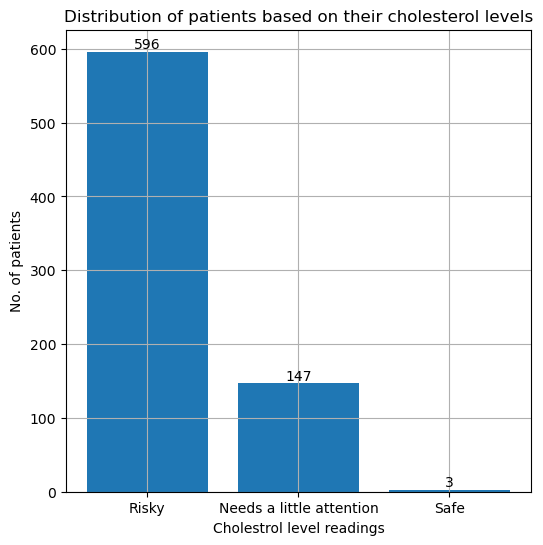

In [13]:
x = df["patient_cholesterols"].value_counts().index
y = df["patient_cholesterols"].value_counts().values
plt.figure(figsize=((6, 6)))
plt.bar(x, y)
plt.title("Distribution of patients based on their cholesterol levels")
plt.xlabel("Cholestrol level readings")
plt.ylabel("No. of patients")
plt.grid(True)
for i in range(len(y)):
    plt.text(x[i], y[i], str(y[i]), ha="center", va="bottom")
plt.show()

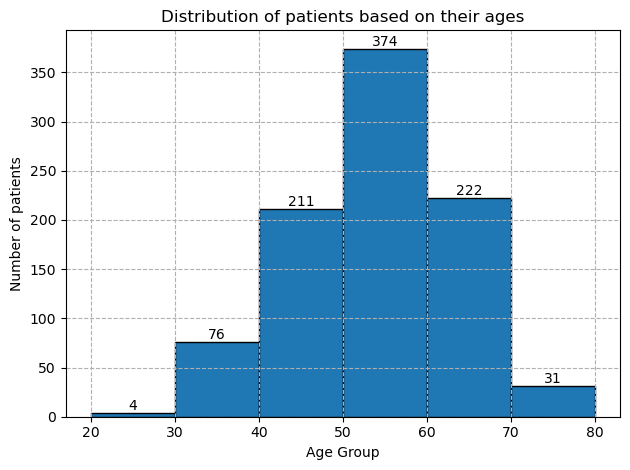

In [14]:
ages = df["Age"].copy().tolist()
bins = [20,30,40,50,60,70,80]
counts, bin_edges, patches = plt.hist(ages, bins=bins, edgecolor="black")
plt.title("Distribution of patients based on their ages")
plt.xlabel("Age Group")
plt.ylabel("Number of patients")
plt.grid(True, linestyle="--")
for count, patch in zip(counts, patches):
    plt.text(
        patch.get_x() + patch.get_width() / 2,      # Center of bar
        count,                                      # Height of bar
        int(count),                                 # Text to show
        ha="center",
        va="bottom"
    )
plt.tight_layout()
plt.savefig("Ages.jpg")
plt.show()

In [15]:
df.drop("patient_cholesterols", axis=1, inplace=True)

# 4. Preparing the data or preprocessing

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [17]:
df["Sex"] = df["Sex"].map({"M":1, "F":0})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y":1, "N":0})

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["ST_Slope"]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

test_set.to_csv("Testing_data.csv", index=False)

In [19]:
features = train_set.drop("HeartDisease", axis=1)
labels = train_set["HeartDisease"].copy()

In [20]:
num_attrs = features.drop(["ChestPainType", "RestingECG", "ST_Slope"], axis=1).columns
cat_attrs = ["ChestPainType", "RestingECG", "ST_Slope"]

In [21]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
full_pipeline = ColumnTransformer([
    ("nums", num_pipeline, num_attrs),
    ("cats", cat_pipeline, cat_attrs)
])

In [22]:
prepared_data = full_pipeline.fit_transform(features)

# 5. Selecting the right model and training it

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
test_features = test_set.drop("HeartDisease", axis=1)
test_labels = test_set["HeartDisease"].copy()
prepared_testing_data = full_pipeline.transform(test_features)

In [25]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(prepared_data, labels)
log_predicts = log_reg.predict(prepared_testing_data)

forest = RandomForestClassifier()
forest.fit(prepared_data, labels)
forest_predicts = forest.predict(prepared_testing_data)

In [26]:
print("Logisitc Regression accuracy:", accuracy_score(test_labels, log_predicts))
print(classification_report(test_labels, log_predicts))

print("Random Forest Classifier accuracy:", accuracy_score(test_labels, forest_predicts))
print(classification_report(test_labels, forest_predicts))

Logisitc Regression accuracy: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        81
           1       0.89      0.90      0.90       103

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Random Forest Classifier accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        81
           1       0.90      0.88      0.89       103

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Hence we will choose Logisitc Regression as our model for training

# 6. Showing results

In [27]:
result_df = pd.read_csv("Predicted_heart_disease.csv")
result_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Predicted_HeartDisease
0,37,1,NAP,118,240.0,0,LVH,165,0,1.0,Flat,0,0
1,43,0,ATA,120,215.0,0,ST,175,0,0.0,Up,0,0
2,47,1,NAP,110,NaN,1,Normal,120,1,0.0,Flat,1,1
3,59,1,TA,134,204.0,0,Normal,162,0,0.8,Up,1,0
4,59,1,NAP,131,NaN,0,Normal,128,1,2.0,Down,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,ASY,110,201.0,0,Normal,126,1,1.5,Flat,0,1
180,32,1,ATA,110,225.0,0,Normal,184,0,0.0,Up,0,0
181,43,1,NAP,130,315.0,0,Normal,162,0,1.9,Up,0,0
182,71,0,ATA,160,302.0,0,Normal,162,0,0.4,Up,0,0


In [28]:
from sklearn.metrics import confusion_matrix

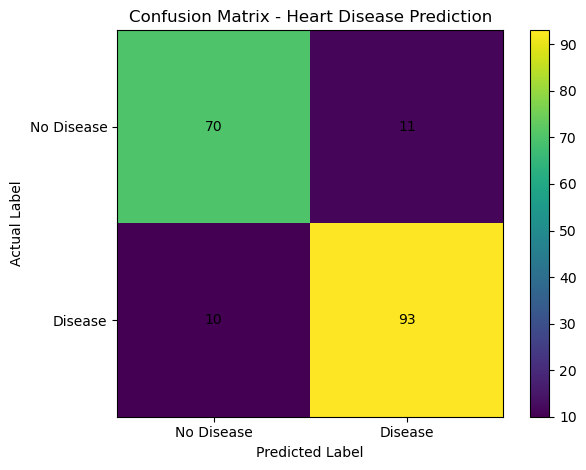

In [29]:
actual = result_df["HeartDisease"].reset_index(drop=True)
pred = result_df["Predicted_HeartDisease"].reset_index(drop=True)

cm = confusion_matrix(actual, pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.yticks([0, 1], ["No Disease", "Disease"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
        
plt.tight_layout()
plt.savefig("Accuracy.jpg")
plt.show()